# Theoretical delays analysis

In [1]:
import sys, os, pprint
sys.path.append(os.path.abspath('../'))

import ptp.reader, ptp.frequency, ptp.metrics, ptp.datasets
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
ds_manager = ptp.datasets.Datasets()

In [3]:
def read_ds(filename):
    ds_path = ds_manager.download(filename)
    reader  = ptp.reader.Reader(ds_path)
    reader.run()
    pprint.pprint(reader.metadata)
    print('-----------------------------------------------------------')
    
    return reader

def analyse(reader, filename, start=None):
    analyser        = ptp.metrics.Analyser(reader.data[start:], filename)
    expected_delays = analyser.calc_expected_delays(reader.metadata, save=False)
    
    # Expected theoretical delays for RRU1
    b_dl_delay   = expected_delays['rru1']['b_dl_delay']
    w_dl_delay   = expected_delays['rru1']['w_dl_delay']
    b_ul_delay   = expected_delays['rru1']['b_ul_delay']
    w_ul_delay   = expected_delays['rru1']['w_ul_delay']
        
    # M-t-S delays
    ms_delay     = np.array([r['d'] for r in reader.data[start:]])
    ms_idx       = range(len(ms_delay))
    
    plt.figure()
    plt.scatter(ms_idx, ms_delay, s=1)
    plt.axhline(y=b_dl_delay*1e9, color='g', linestyle='-', label="Best-case")
    plt.axhline(y=w_dl_delay*1e9, color='r', linestyle='-', label="Worst-case")
    plt.xlabel('Sample')
    plt.ylabel('Delay (ns)')
    plt.title("Master-to-slave")
    plt.legend()
    plt.show()
        
    max_ms_delay = np.amax(ms_delay)
    min_ms_delay = np.amin(ms_delay)

    print(f"Max m-t-s delay: \t Real: {max_ms_delay*1e-3:.4f} us \t Th: {w_dl_delay*1e6:.4f} us ")
    print(f"Min m-t-s delay: \t Real: {min_ms_delay*1e-3:.4f} us \t Th: {b_dl_delay*1e6:.4f} us ")

    # S-t-M delays
    sm_delay     = np.array([r['d_bw'] for r in reader.data[start:]])
    sm_idx       = range(len(sm_delay))
    
    plt.figure()
    plt.scatter(sm_idx, sm_delay, s=1)
    plt.axhline(y=b_ul_delay*1e9, color='g', linestyle='-', label="Best-case")
    plt.axhline(y=w_ul_delay*1e9, color='r', linestyle='-', label="Worst-case")
    plt.xlabel('Sample')
    plt.ylabel('Delay (ns)')
    plt.title("Slave-to-master")
    plt.legend()
    plt.show()
        
    max_sm_delay = np.amax(sm_delay)
    min_sm_delay = np.amin(sm_delay)

    print(f"Max s-t-m delay: \t Real: {max_sm_delay*1e-3:.4f} us \t Th: {w_ul_delay*1e6:.4f} us ")
    print(f"Min s-t-m delay: \t Real: {min_sm_delay*1e-3:.4f} us \t Th: {b_ul_delay*1e6:.4f} us ")

## Scenario #1: 2 RRUs in DL and 2 RRUs active in the UL

In [4]:
ds_1     = "serial-20200505-202844"
reader_1 = read_ds(ds_1)

sequenceId gaps identified: 1
{'delay_cal': True,
 'delay_cal_duration': 3600,
 'fh_traffic': {'bitrate': {'dl': 837120000.0, 'ul': 837120000.0},
                'fs': 7680000,
                'iq_size': 24,
                'n_rru_dl': 2,
                'n_rru_ul': 2,
                'n_spf': 64,
                'type': 'inline'},
 'hops': {'rru1': 4, 'rru2': 4},
 'n_rru_ptp': 2,
 'oscillator': 'xo',
 'pipelines': {'bbu': '2740', 'rru': '2740'},
 'start_time': '2020-05-05 20:28:39',
 'sync_period': 0.0625}
-----------------------------------------------------------


DL FH delay for rru1: best-case: 21.2413 us worst-case: 22.5520 us
UL FH delay for rru1: best-case: 19.3533 us worst-case: 24.4400 us 
DL FH delay for rru2: best-case: 21.2413 us worst-case: 22.5520 us
UL FH delay for rru2: best-case: 19.3533 us worst-case: 24.4400 us 


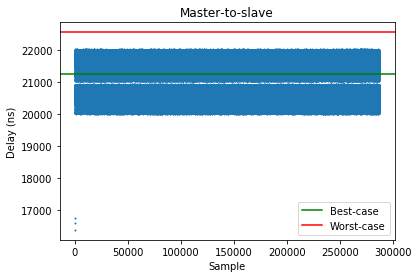

Max m-t-s delay: 	 Real: 22.0320 us 	 Th: 22.5520 us 
Min m-t-s delay: 	 Real: 16.3880 us 	 Th: 21.2413 us 


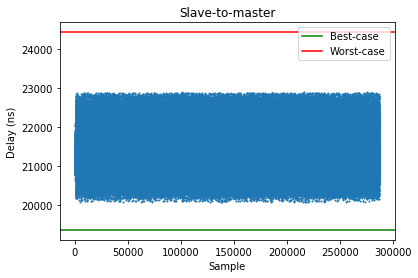

Max s-t-m delay: 	 Real: 22.8910 us 	 Th: 24.4400 us 
Min s-t-m delay: 	 Real: 20.0700 us 	 Th: 19.3533 us 


In [5]:
analyse(reader_1, ds_1)

## Scenario #2: 2 RRUs in DL and 1 RRU active in the UL

In [6]:
ds_2     = "serial-20200506-221422"
reader_2 = read_ds(ds_2)

sequenceId gaps identified: 1
{'delay_cal': True,
 'delay_cal_duration': 300,
 'fh_traffic': {'bitrate': {'dl': 837120000.0, 'ul': 418560000.0},
                'fs': 7680000,
                'iq_size': 24,
                'n_rru_dl': 2,
                'n_rru_ul': 1,
                'n_spf': 64,
                'type': 'inline'},
 'hops': {'rru1': 4, 'rru2': 4},
 'n_rru_ptp': 1,
 'oscillator': 'xo',
 'pipelines': {'bbu': '2740', 'rru': '2740'},
 'start_time': '2020-05-06 22:14:05',
 'sync_period': 0.0625}
-----------------------------------------------------------


DL FH delay for rru1: best-case: 21.2413 us worst-case: 22.5520 us
UL FH delay for rru1: best-case: 19.3533 us worst-case: 22.5520 us 
DL FH delay for rru2: best-case: 21.2413 us worst-case: 22.5520 us
UL FH delay for rru2: best-case: 19.3533 us worst-case: 22.5520 us 


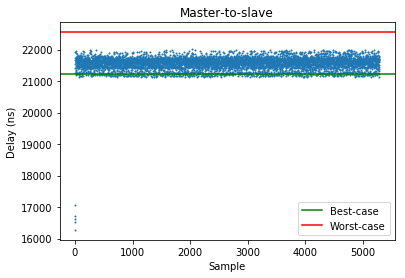

Max m-t-s delay: 	 Real: 22.0060 us 	 Th: 22.5520 us 
Min m-t-s delay: 	 Real: 16.2760 us 	 Th: 21.2413 us 


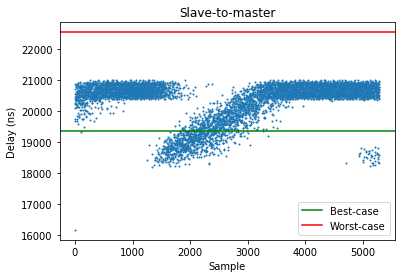

Max s-t-m delay: 	 Real: 21.0210 us 	 Th: 22.5520 us 
Min s-t-m delay: 	 Real: 16.1740 us 	 Th: 19.3533 us 


In [7]:
analyse(reader_2, ds_2)